In [1]:
from pandas import*
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from numpy import *
%matplotlib inline

In [2]:
car_data=read_csv(r'C:\Users\Asus\Downloads\CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
car_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
corr=car_data.corr()
corr

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


Co relation  is done between Numerical values only

In [6]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
car_data["fuel"].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [8]:
car_data.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [9]:
car_data.transmission.value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [10]:
car_data.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

Now encoding the data

encoding fuel type data

In [11]:
car_data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car_data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
car_data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


In [12]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


spliting the training and testing data

In [13]:
x=car_data.drop(["name", 'selling_price'],axis=1)
y= car_data['selling_price']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=2)

In [15]:
linr_reg=LinearRegression()

In [16]:
linr_reg.fit(x_train,y_train)

LinearRegression()

MOdel evaluation

In [17]:
training_data_prediction=linr_reg.predict(x_train)

In [18]:
training_data_prediction

array([ 647661.57849087,  540216.66474643, 1320396.42687961, ...,
        499712.85362872,  368143.15720452,  549960.47052467])

In [19]:
y_train

3581    720000
4191    565000
2450    500000
984     325000
3546    300000
         ...  
3335    500000
1099    520000
2514    420000
3606    300000
2575    210000
Name: selling_price, Length: 3472, dtype: int64

In [20]:
error_score=metrics.r2_score(y_train,training_data_prediction)
error_score

0.4283228894762542

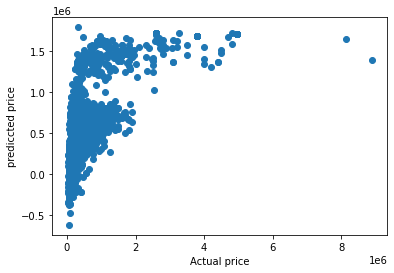

In [21]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("prediccted price")
plt.show()

In [22]:
testing_data_prediction=linr_reg.predict(x_test)


In [23]:
error_score=metrics.r2_score(y_test,testing_data_prediction)
error_score

0.49180054606795076

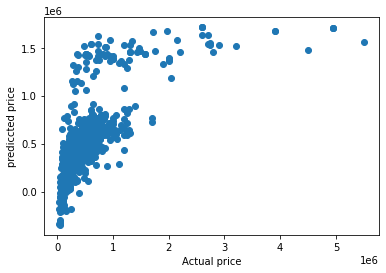

In [24]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("prediccted price")
plt.show()

Lasso Regression

In [25]:
lasso_reg=Lasso()

In [26]:
lasso_reg.fit(x_train,y_train)

Lasso()

In [29]:
training_data_prediction1=lasso_reg.predict(x_train)
training_data_prediction1

array([ 647661.9565316 ,  540212.91255969, 1320390.0878161 , ...,
        499712.09469381,  368141.57585151,  549963.36801594])

In [28]:
error_score=metrics.r2_score(y_train,training_data_prediction1)
error_score

0.42832288942328445

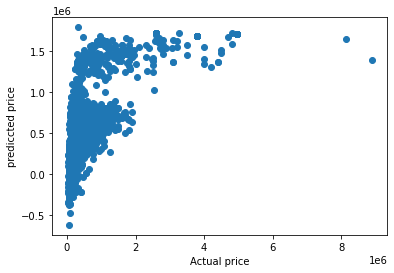

In [30]:
plt.scatter(y_train,training_data_prediction1)
plt.xlabel("Actual price")
plt.ylabel("prediccted price")
plt.show()

In [31]:
testing_data_prediction1=lasso_reg.predict(x_test)

In [32]:
error_score=metrics.r2_score(y_test,testing_data_prediction1)
error_score

0.49180025422174856

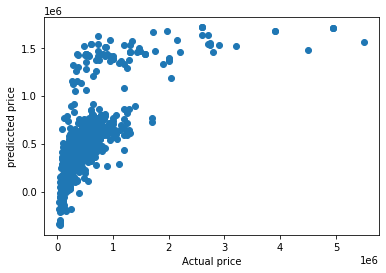

In [33]:
plt.scatter(y_test,testing_data_prediction1)
plt.xlabel("Actual price")
plt.ylabel("prediccted price")
plt.show()

so the lasso and linear regression model are quite same

Done